In [116]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import random
from scipy.stats import skew, kurtosis, variation, moment
import scipy.integrate as integrate
from math import sqrt, exp, pi
import math

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
    def __str__(self):
        return self._repr_html_()

def average(arr):
    res = 0
    for i in arr:
        res += i
    return res / len(arr)

def std_sqrt_deviation(arr):
    res = 0
    avg = average(arr)
    for i in arr:
        res += (i - avg)**2
    return sqrt(res / len(arr))

In [117]:
'''Вариант 1.
Из колоды (36 карт) наудачу извлекаются 3 карты.
Найти вероятность того, что сумма очков этих карт будет равна 21.'''

#Массив типов карт
card_types = [2, 3, 4, 6, 7, 8, 9, 10, 11]

#Массив колличеств тестов
n = [10, 100, 1000, 10**4]

#Количество запусков тестов
k = 10

#Функция создания колоды
def make_deck():
    cards = []
    for i in card_types:
        for j in range(0, 4):
            cards.append(i)
    return cards

#Функция вытаскивания одной случайной карты из колоды
def draw(cards):
    return cards.pop(random.randrange(0, len(cards)))

#Функция одной игры(вытаскивание 3-ех карт и подсчет их суммы)
def play():
    cards = make_deck()
    score = 0
    for i in range(0, 3):
        score += draw(cards)
    return score

#Функция совершения n игр и подсчета их результатов
def make_n_plays(n):
    count = 0
    plays = []
    for i in range(0, n):
        p = play()
        if p == 21:
            count += 1
        plays.append(p)
    return count / n, plays

#Аналитическое решение
solution = 0.078991596

#Цикл запуска тестов и вывода результатов
for j in n:
    table = ListTable()
    table.append(['P', 'P*', 'Delta'])
    sigma = 0
    for i in range(0, k):
        p, plays = make_n_plays(j)
        sigma += solution - p
        table.append([solution, p, solution - p])
    
    print('n = {}'.format(j))
    display(table)
    print('sigma: {0}'.format(sigma / k))
    print('')

n = 10


P,P*,Delta
0.078991596,0.0,0.078991596
0.078991596,0.3,-0.221008404
0.078991596,0.0,0.078991596
0.078991596,0.1,-0.02100840400000001
0.078991596,0.0,0.078991596
0.078991596,0.1,-0.02100840400000001
0.078991596,0.1,-0.02100840400000001
0.078991596,0.1,-0.02100840400000001
0.078991596,0.0,0.078991596
0.078991596,0.2,-0.12100840400000001


sigma: -0.011008404000000005

n = 100


P,P*,Delta
0.078991596,0.08,-0.0010084040000000044
0.078991596,0.05,0.028991595999999994
0.078991596,0.07,0.00899159599999999
0.078991596,0.06,0.018991596
0.078991596,0.09,-0.011008404
0.078991596,0.09,-0.011008404
0.078991596,0.08,-0.0010084040000000044
0.078991596,0.09,-0.011008404
0.078991596,0.12,-0.041008404
0.078991596,0.05,0.028991595999999994


sigma: 0.0009915959999999974

n = 1000


P,P*,Delta
0.078991596,0.083,-0.004008404000000007
0.078991596,0.088,-0.009008403999999998
0.078991596,0.074,0.004991596000000001
0.078991596,0.093,-0.014008404000000002
0.078991596,0.074,0.004991596000000001
0.078991596,0.074,0.004991596000000001
0.078991596,0.071,0.007991596000000004
0.078991596,0.077,0.0019915959999999983
0.078991596,0.073,0.005991596000000002
0.078991596,0.064,0.014991595999999996


sigma: 0.0018915959999999995

n = 10000


P,P*,Delta
0.078991596,0.0776,0.001391595999999995
0.078991596,0.0775,0.0014915959999999978
0.078991596,0.0798,-0.0008084039999999987
0.078991596,0.0801,-0.0011084040000000073
0.078991596,0.0794,-0.0004084040000000011
0.078991596,0.0846,-0.005608403999999997
0.078991596,0.0773,0.0016915960000000035
0.078991596,0.0837,-0.004708403999999999
0.078991596,0.0784,0.0005915959999999998
0.078991596,0.077,0.0019915959999999983


sigma: -0.0005484040000000009



In [118]:
'''Вариант 5.
В круге радиуса R проводятся хорды параллельно заданному направлению.
Какова вероятность того, что длина наугад взятой хорды не более R,
если равновозможны любые положения точек пересечения хорды с диаметром,
перпендикулярным выбранному направлению?'''

#Радиус окружности
R = 1000

#Количество запусков теста
k = k

#Функия проведения хорды
def draw_chord():
    return sqrt(R**2 - random.uniform(0, R)**2) * 2

#Функция, проводящая n хорд
def make_n_attempts(n):
    count = 0
    attempts = []
    for i in range(0, n):
        chord = draw_chord()
        count += chord <= R
        attempts.append(chord)
    return count / n, attempts

#Аналитическое решение
solution = 1 - sqrt(3)/2

#Цикл запуска тестов и вывода результатов
for j in n:
    table = ListTable()
    table.append(['P', 'P*', 'Delta'])
    sigma = 0
    for i in range(k):
        p, attempts = make_n_attempts(j)
        dif = solution - p
        sigma += dif
        table.append([solution, p, dif])

    print('n = {}'.format(j))
    display(table)
    print('sigma: {0}'.format(sigma / k))
    print('')

n = 10


P,P*,Delta
0.1339745962155614,0.2,-0.06602540378443861
0.1339745962155614,0.0,0.1339745962155614
0.1339745962155614,0.2,-0.06602540378443861
0.1339745962155614,0.1,0.0339745962155614
0.1339745962155614,0.0,0.1339745962155614
0.1339745962155614,0.1,0.0339745962155614
0.1339745962155614,0.2,-0.06602540378443861
0.1339745962155614,0.2,-0.06602540378443861
0.1339745962155614,0.2,-0.06602540378443861
0.1339745962155614,0.2,-0.06602540378443861


sigma: -0.006025403784438605

n = 100


P,P*,Delta
0.1339745962155614,0.11,0.023974596215561403
0.1339745962155614,0.16,-0.0260254037844386
0.1339745962155614,0.14,-0.00602540378443861
0.1339745962155614,0.09,0.04397459621556141
0.1339745962155614,0.1,0.0339745962155614
0.1339745962155614,0.08,0.0539745962155614
0.1339745962155614,0.15,-0.01602540378443859
0.1339745962155614,0.07,0.0639745962155614
0.1339745962155614,0.17,-0.03602540378443861
0.1339745962155614,0.19,-0.0560254037844386


sigma: 0.007974596215561399

n = 1000


P,P*,Delta
0.1339745962155614,0.126,0.007974596215561403
0.1339745962155614,0.133,0.0009745962155613963
0.1339745962155614,0.141,-0.007025403784438583
0.1339745962155614,0.129,0.0049745962155614
0.1339745962155614,0.123,0.010974596215561405
0.1339745962155614,0.126,0.007974596215561403
0.1339745962155614,0.125,0.008974596215561403
0.1339745962155614,0.131,0.002974596215561398
0.1339745962155614,0.135,-0.0010254037844386055
0.1339745962155614,0.137,-0.0030254037844386072


sigma: 0.0033745962155614013

n = 10000


P,P*,Delta
0.1339745962155614,0.1357,-0.0017254037844385839
0.1339745962155614,0.132,0.001974596215561397
0.1339745962155614,0.134,-2.5403784438604582e-05
0.1339745962155614,0.1298,0.004174596215561405
0.1339745962155614,0.1308,0.003174596215561404
0.1339745962155614,0.135,-0.0010254037844386055
0.1339745962155614,0.1312,0.0027745962155613924
0.1339745962155614,0.1353,-0.0013254037844386002
0.1339745962155614,0.1343,-0.0003254037844385993
0.1339745962155614,0.1318,0.002174596215561403


sigma: 0.0009845962155614007



In [119]:
#Функция одного выстрела
def shot():
    v = random.uniform(0.0,1.0)
    if v < 0.5:
        return 10
    elif v < 0.8:
        return 5
    else:
        return -1

#Функция, совершающая 3 выстрела и подсчитывающая их результат
def make_shots():
    res = 0
    for i in range(3):
        res += shot()
    return res

#Функция, создающая массив результатов выстрелов
def make_shots_list(n):
    res = []
    for i in range(0, n):
        res.append(make_shots())
    return res

def cdf(shots):
    data = np.cumsum(np.histogram(shots, bins=auto, density=True))
        
shots = make_shots_list(100000)

In [120]:
import collections
x_dict = {}
for i in shots:
    if i not in x_dict:
        x_dict[i] = 1
    else:
        x_dict[i] += 1    
x_dict = collections.OrderedDict(sorted(x_dict.items()))
x_table = ListTable()
x_table.append([])
x_table.append([])
n = len(shots)
for i, k in x_dict.items():
    x_table[0].append(i)
    x_table[1].append(k / n)
print("Ряд распределения")
x_table

Ряд распределения


-3,3,8,9,14,15,19,20,25,30
0.00812,0.03635,0.06069,0.05345,0.17865,0.02616,0.1483,0.13579,0.22546,0.12703


Многоугольник распределения


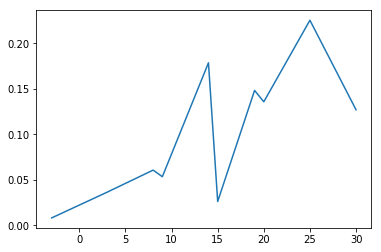

In [121]:
plt.plot(x_table[0], x_table[1]);
print("Многоугольник распределения")

Гистограма распределения


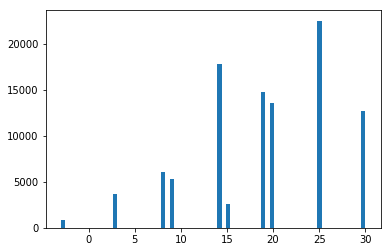

In [142]:
def histogram(shots):
    return plt.hist(shots, bins='auto')

a,b,c = histogram(shots)
print("Гистограма распределения")

Статистическая функция распределения


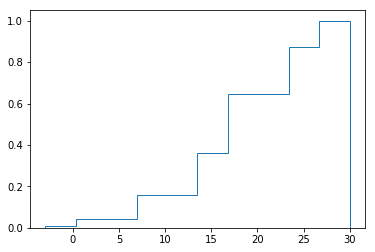

In [143]:
def cdf_plot(shots):
    plt.hist(shots, normed=True, cumulative=True, label='CDF', histtype='step', range=(-3, 30))
cdf_plot(shots)
print("Статистическая функция распределения")

In [124]:
print("Среднее: {0}".format(average(shots)))

Среднее: 18.92566


In [125]:
print("Аналитически среднее: {}".format(3 * (0.5 * 10 + 0.3 * 5 - 0.2)))

Аналитически среднее: 18.9


In [126]:
print("Аналитически дисперсия: {}".format(3 * (0.5 * 10 + 0.3 * 5 - 0.2)))

Аналитически дисперсия: 18.9


In [127]:
print("Дисперсия: {0}".format(np.var(shots)))

Дисперсия: 54.42643356439999


In [128]:
print("Коэффицент ассиметрии: {}".format(skew(shots)))

Коэффицент ассиметрии: -0.40728155967901714


In [129]:
print("Коэффицент эксцесса: {}".format(kurtosis(shots)))

Коэффицент эксцесса: -0.32379498752144364


In [130]:
def prob(series, k):
    if k < series[0][0]:
        return 0
    elif k > series[0][-1]:
        return 1
    else:
        return series[1][np.searchsorted(series[0], k)]
    
def prob_range(series, k, t):
    return prob(series, t) - prob(series, k)

In [131]:
print("Вероятность попадания в промежуток [2, 7]: {0}".format(prob_range(x_table, 2, 7)))

Вероятность попадания в промежуток [2, 7]: 0.02434


In [132]:
def density(x):
    return 1/sqrt(pi) * exp(-(x**2))

Плотность распределения


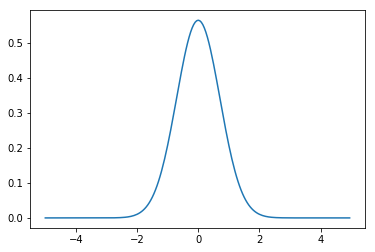

In [133]:
start = -5
step = 0.05
steps = -(start + start) / step
x_axis = list(map(lambda x : start + step * x, range(0, int(steps))))
y_axis = list(map(density, x_axis))
plt.plot(x_axis, y_axis);
print("Плотность распределения")

Функция распределения


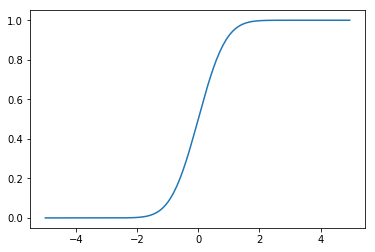

In [134]:
result = list(map(lambda x: integrate.quad(density, -float('inf'), x)[0],x_axis))
plt.plot(x_axis, result);
print("Функция распределения")

In [144]:
k = 100
data = [ random.normalvariate(0, sqrt(1 / pi)) for i in range(0, k)]

print("E: {0}".format(average(data)))
print("D: {0}".format(np.var(data)))
print(skew(data))
print(kurtosis(data))

E: 0.01769102533338746
D: 0.30495321083314847
0.2802186076970469
0.30384796004752923


Гистограма


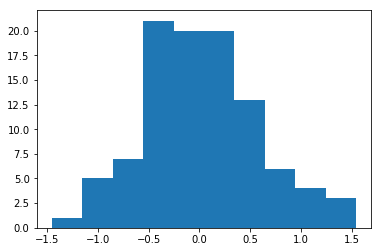

In [145]:
a,b,c = histogram(data);
print("Гистограма")

Статистическая функция распределения


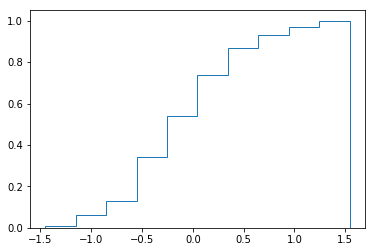

In [146]:
a = plt.hist(data, normed=True, cumulative=True, label='CDF', histtype='step', bins='auto')
print("Статистическая функция распределения")